In [209]:
# Import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sb
warnings.filterwarnings("ignore")

In [210]:
df=pd.read_csv('allocine_brut.csv')

## Data Cleaning and preparation

In [215]:
#Select only movies with ratings from both critics and audience
df_s=df[df.press_rating.notnull() & df.user_rating.notnull()]

In [216]:
#Define the gap between average critics' rating and audience rating
df_s['diff']=df_s['press_rating']-df_s['user_rating'] 

In [264]:
df_s['genre']=df_s['genre'].apply(lambda x : x.replace('[','')) 
df_s['genre']=df_s['genre'].apply(lambda x : x.replace(']',''))
df_s['genre']=df_s['genre'].apply(lambda x : x.replace("'",''))

df_s['directors']=df_s['directors'].apply(lambda x : x.replace('[','')) 
df_s['directors']=df_s['directors'].apply(lambda x : x.replace(']',''))
df_s['directors']=df_s['directors'].apply(lambda x : x.replace("'",''))

df_s['nationality']=df_s['nationality'].apply(lambda x : x.replace('[','')) 
df_s['nationality']=df_s['nationality'].apply(lambda x : x.replace(']',''))
df_s['nationality']=df_s['nationality'].apply(lambda x : x.replace("'",''))


In [218]:
#Rename in english the genre for the most populated categories
df_s['genre']=df_s['genre'].apply(lambda x : x.replace('Drame','Drama'))
df_s['genre']=df_s['genre'].apply(lambda x : x.replace('Comédie','Comedy'))
df_s['genre']=df_s['genre'].apply(lambda x : x.replace('Comédie dramatique','comedy drama'))
df_s['genre']=df_s['genre'].apply(lambda x : x.replace('Documentaire','Documentary'))
df_s['genre']=df_s['genre'].apply(lambda x : x.replace('Policier','Crime movie'))
df_s['genre']=df_s['genre'].apply(lambda x : x.replace('Epouvante-horreur','Horror movie'))
df_s['genre']=df_s['genre'].apply(lambda x : x.replace('Fantastique','Fantasie movie'))
df_s['genre']=df_s['genre'].apply(lambda x : x.replace('Aventure','Adventure movie'))

In [219]:
df_s['genre_1']=df_s['genre'].apply(lambda x : x.split(',')[0])

In [265]:
df_s['nationality_1']=df_s['nationality'].apply(lambda x : x.split(',')[0])

## Presentation of the distribution of our main variable of interest: the gap between critics' and audience's reviews. 

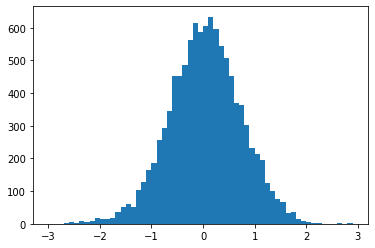

In [220]:
#plot the distribution of the variable depicting the gap between critics' and audience's ratings.   

bin_edge=np.arange(-3,3,0.1);
plt.hist(data=df_s,x='diff',bins=bin_edge);

The distribution is normal. 

## First insight: critics are negatively biaised toward action movies, biopic and science fiction

In [221]:
#Select only categories of genres with at least 100 movies
select_cat=df_s.groupby(['genre_1'],as_index=False).count().query('diff>=100')['genre_1'].tolist()


In [227]:
table=df_s[df_s.genre_1.isin(select_cat)]

In [228]:
order_cat=table.groupby(['genre_1'],as_index=False).mean().sort_values(by=('diff'))

In [229]:
table_2=table.merge(order_cat,left_on='genre_1',right_on='genre_1')


In [230]:
grouped = table.loc[:,['genre_1', 'diff']] \
    .groupby(['genre_1']) \
    .median() \
    .sort_values(by='diff')

Text(0, 0.5, '')

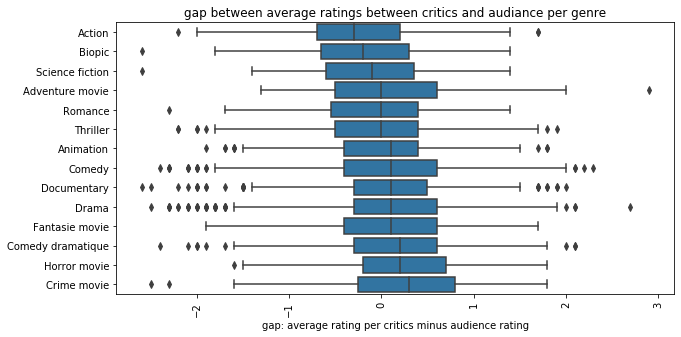

In [231]:
base_color=sb.color_palette()[0]

plt.figure(figsize=[10,5])
sb.boxplot(data=table_2,y='genre_1',x='diff_x',order=grouped.index,color=base_color)
plt.xticks(rotation=90)
plt.title('gap between average ratings between critics and audiance per genre')
plt.xlabel('gap: average rating per critics minus audience rating')
plt.ylabel('')

Action movies, biopic and science fiction seem to be less appreciated by the critics than the audience. On the other hand, comedy dramatique, horror and crime ratings from the critics are on average higher.  

## Second insight: most movies directed by famous directors are overrated by the critics compared to the audience

Let's select the top50 of directors on the number of movies directed with at least 10 movies rated both from the audience and the critics. 

In [258]:
l=df_s.groupby(['directors'],as_index=False).count().sort_values(by="diff").tail(50)['directors'].tolist()

In [310]:
df_3 = df_s[df_s.directors.isin(l)].groupby(['directors'],as_index=False).mean().sort_values(by='diff')

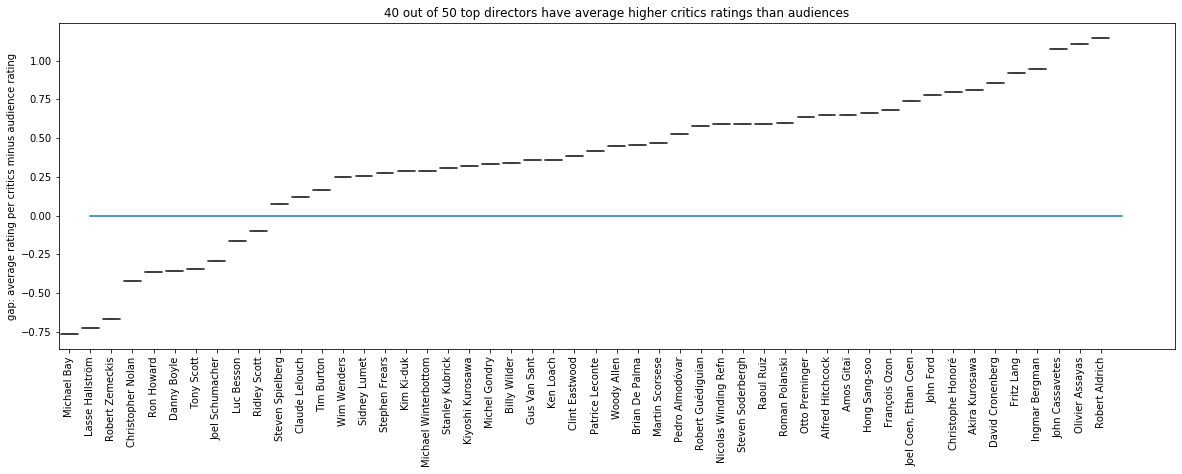

In [311]:
plt.figure(figsize=[20,6]);
sb.boxplot(data=df_3,x='directors',y='diff',color=base_color);
plt.xticks(rotation=90);
plt.title('40 out of 50 top directors have average higher critics ratings than audiences');
plt.xlabel('');
plt.ylabel('gap: average rating per critics minus audience rating');
x_coordinates = [1, 50];
y_coordinates = [0, 0];
plt.plot(x_coordinates, y_coordinates);

## Third insight: country of production seems to play a role:

In [312]:
#WOrk on the nationality 
nat_group=df_s.groupby(['nationality_1'],as_index=False).count().sort_values(by="diff").tail(8)['nationality_1'].tolist()


In [313]:
a=df_s[df_s.nationality_1.isin(nat_group)].groupby(['nationality_1'],as_index=False).mean()[['nationality_1','press_rating','user_rating']]

In [314]:
b=pd.melt(a, id_vars=['nationality_1'], value_vars=['press_rating','user_rating'])

In [315]:
b['nationality_1']=b['nationality_1'].apply(lambda x : x.replace('allemand','German'))
b['nationality_1']=b['nationality_1'].apply(lambda x : x.replace('américain','US'))
b['nationality_1']=b['nationality_1'].apply(lambda x : x.replace('britannique','UK'))
b['nationality_1']=b['nationality_1'].apply(lambda x : x.replace('canadien','Canadian'))
b['nationality_1']=b['nationality_1'].apply(lambda x : x.replace('espagnol','Spanish'))
b['nationality_1']=b['nationality_1'].apply(lambda x : x.replace('français','French'))
b['nationality_1']=b['nationality_1'].apply(lambda x : x.replace('italien','Italian'))
b['variable']=b['variable'].apply(lambda x : x.replace('press_rating','critics'))

b['variable']=b['variable'].apply(lambda x : x.replace('user_rating','audience'))


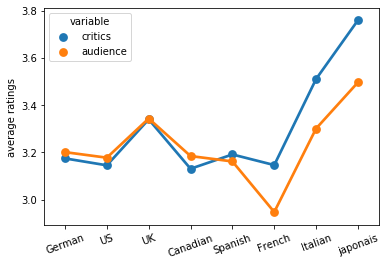

In [316]:
sb.pointplot(data=b,x='nationality_1',y='value',hue='variable');
plt.xticks(rotation=20);
plt.xlabel('');
plt.ylabel('average ratings');

French public tends to enjoy less French movies compared to international productions but this trend does not appear for critics.